In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#READ CSV files
id_train = pd.read_csv(r'D:\Projects\ML_PROJECT\ieee-fraud-detection\train_identity.csv')
id_test = pd.read_csv(r'D:\Projects\ML_PROJECT\ieee-fraud-detection\test_identity.csv')
train_transaction = pd.read_csv(r'D:\Projects\ML_PROJECT\ieee-fraud-detection\train_transaction.csv')
test_transaction = pd.read_csv(r'D:\Projects\ML_PROJECT\ieee-fraud-detection\test_transaction.csv')

In [14]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Comparing column names of two dataframes
print(set(id_train.columns).intersection(set(train_transaction.columns))) 
print(set(id_test.columns).intersection(set(test_transaction.columns)))

{'TransactionID'}
{'TransactionID'}


In [3]:
#Let merge two data base on 'TransactionID' 
train = pd.merge(train_transaction,id_train, on='TransactionID', how='left')
test = pd.merge(test_transaction,id_test, on='TransactionID', how='left')
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Train dataset has {test.shape[0]} rows and {test.shape[1]} columns.')
train.head()

Train dataset has 590540 rows and 434 columns.
Train dataset has 506691 rows and 433 columns.


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [19]:
%%time
# Reduce memory  https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

Wall time: 0 ns


In [20]:
train=reduce_mem_usage(train)

Memory usage of dataframe is 1959.88 MB
Memory usage after optimization is: 530.08 MB
Decreased by 73.0%


In [21]:
#Check missing value
def missing_value(df) :
    count = df.isnull().sum()
    percent = (df.isnull().sum()) / (df.isnull().count()) * 100
    total = pd.concat([count, percent], axis=1, keys = ['Count', 'Percent'])
    types = []
    for col in df.columns :
        dtypes = str(df[col].dtype)
        types.append(dtypes)
    total['dtypes'] = types
    
    return np.transpose(total)

In [22]:
missing_value(train)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
Count,0,0,0,0,0,0,8933,1565,1577,4259,...,450258,512954,517251,512735,449555,449555,449555,449555,449730,471874
Percent,0,0,0,0,0,0,1.51268,0.265012,0.267044,0.721204,...,76.2451,86.8619,87.5895,86.8248,76.1261,76.1261,76.1261,76.1261,76.1557,79.9055
dtypes,int32,int8,int32,float16,category,int16,float16,float16,category,float16,...,category,float16,category,category,category,category,category,category,category,category


In [23]:
missing_value(test)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
Count,0,0,0,0,0,8654,3002,3086,4547,3007,...,370066,436020,436020,434516,369714,369714,369714,369714,369760,391634
Percent,0,0,0,0,0,1.70794,0.592472,0.60905,0.897391,0.593458,...,73.0358,86.0524,86.0524,85.7556,72.9664,72.9664,72.9664,72.9664,72.9754,77.2925
dtypes,int64,int64,float64,object,int64,float64,float64,object,float64,object,...,object,float64,object,object,object,object,object,object,object,object


In [24]:
#identify categorical and numerical columns
cat_cols = train.dtypes[train.dtypes == 'category'].index.tolist()
num_cols = train.dtypes[train.dtypes != 'category'].index.tolist()

In [25]:
#Check info. for each cat cols 
for c in list(cat_cols) :
    print(train[c].value_counts())
    print('=='*100)

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64
gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          51

Windows 10          21155
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
                    ...  
func                   10
iOS 11.4.0              5
Mac OS X 10_13_5        4
Windows                 3
iOS 11.4.1              1
Name: id_30, Length: 75, dtype: int64
chrome 63.0              22000
mobile safari 11.0       13423
mobile safari generic    11474
ie 11.0 for desktop       9030
safari generic            8195
                         ...  
cyberfox                     1
firefox mobile 61.0          1
iron                         1
seamonkey                    1
BLU/Dash                     1
Name: id_31, Length: 130, dtype: int64
1920x1080    16874
1366x768      8605
1334x750      6447
2208x1242     4900
1440x900      4384
             ...  
1536x960         1
1596x710         1
2816x1584        1
2800x1575        1
976x600          1
Name: id_33, Length: 260, dtype: int64
match_status:2     60011
match_status:1     1737

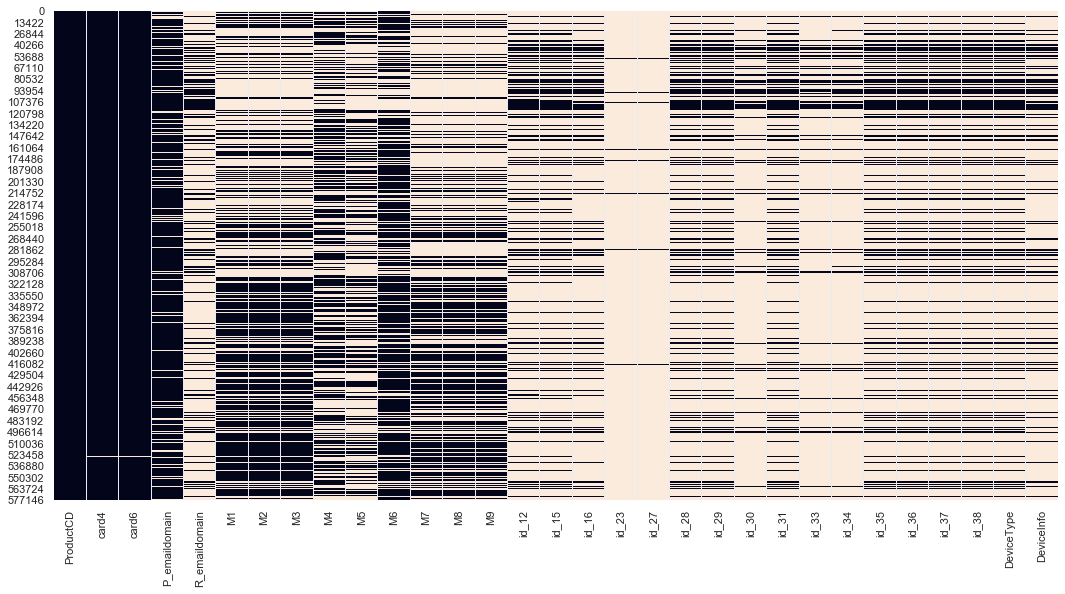

In [30]:
plt.figure(figsize=(18,9))
sns.heatmap(train[cat_cols].isnull(), cbar= False)

# EDA

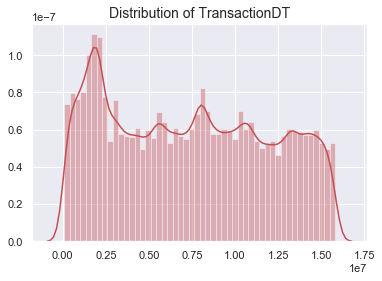

In [39]:
#Let plot 'TransactionDT'
time_val = train['TransactionDT'].values
sns.distplot(train['TransactionDT'].values,  color='r').set_title('Distribution of TransactionDT', fontsize=14)
plt.show()

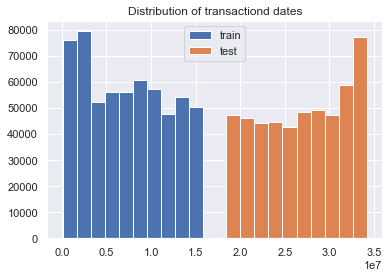

In [40]:
#Let plot hist for transaction
plt.hist(train['TransactionDT'], label='train');
plt.hist(test['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

No overlapping between train and test

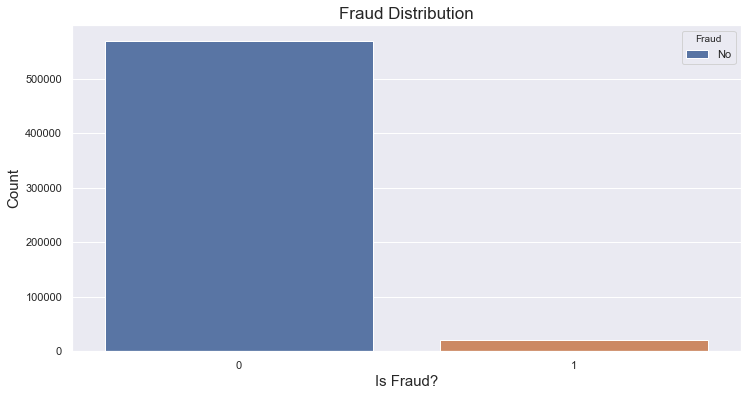

In [43]:
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'isFraud', data = train)
g.set_title("Fraud Distribution", fontsize = 17)
g.set_xlabel("Is Fraud?", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
plt.legend(title='Fraud', labels=['No', 'Yes'])


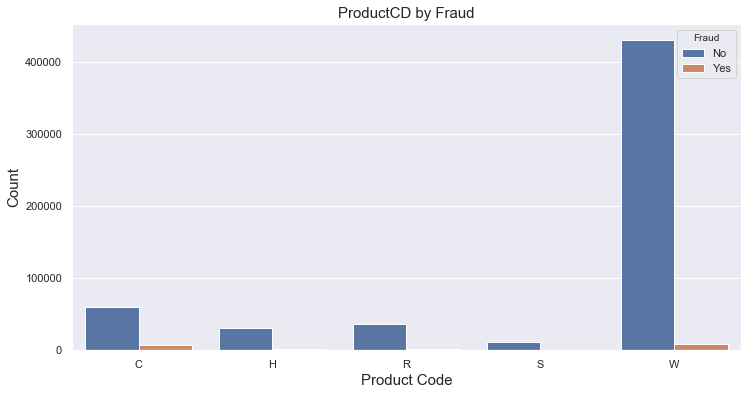

In [49]:
#Explor cat_col
plt.figure(figsize=(12,6))
a = sns.countplot(x='ProductCD', hue='isFraud', data=train)
a.set_title('ProductCD by Fraud', fontsize = 15)
a.set_xlabel("Product Code", fontsize=15)
a.set_ylabel("Count", fontsize=15)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

<Figure size 1296x1296 with 0 Axes>

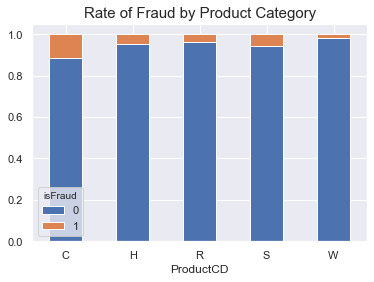

In [50]:
# visualization of table
plt.figure(figsize=(18,18))
a = train.groupby('ProductCD')['isFraud'].value_counts(normalize = True).unstack().plot.bar(stacked = True)
a.set_title('Rate of Fraud by Product Category', fontsize = 15)
plt.xticks(rotation='horizontal')

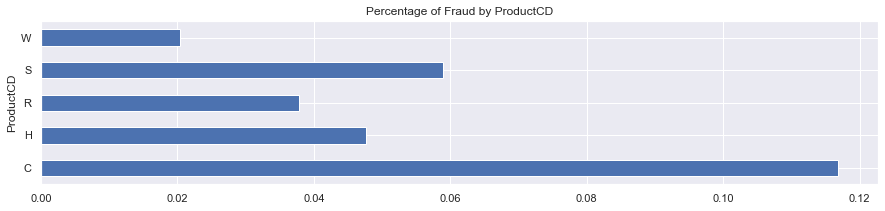

In [51]:
train.groupby('ProductCD')['isFraud'] \
    .mean() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Percentage of Fraud by ProductCD')
plt.show()

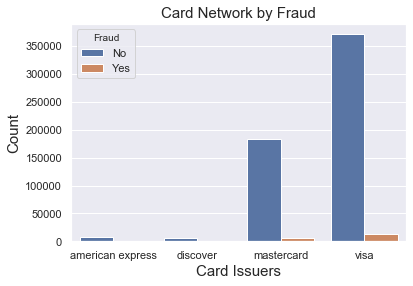

In [60]:
#Plot card 4 to check fraud
c =sns.countplot(x='card4', hue='isFraud', data=train)
c.set_title('Card Network by Fraud', fontsize = 15)
c.set_xlabel("Card Issuers", fontsize=15)
c.set_ylabel("Count", fontsize=15)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 864x864 with 0 Axes>

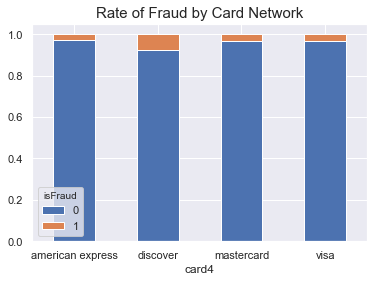

In [63]:

plt.figure(figsize=(12,12))
f = train.groupby('card4')['isFraud'].value_counts(normalize = True).unstack().plot.bar(stacked = True)
f.set_title('Rate of Fraud by Card Network', fontsize = 15)
plt.xticks(rotation='horizontal')

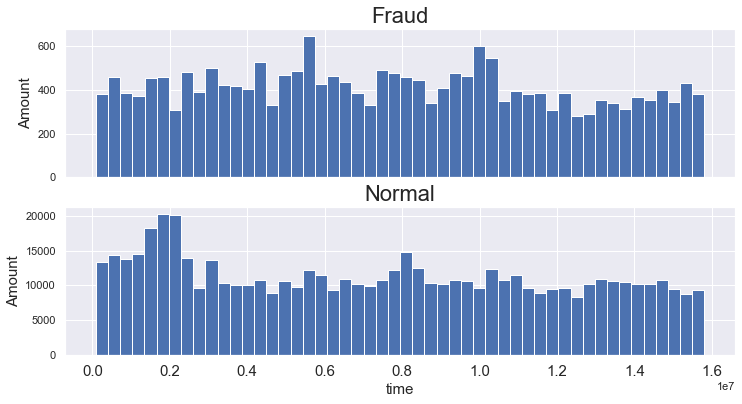

In [68]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(12,6))
bins=50
ax1.hist(train_transaction.TransactionDT[train.isFraud == 1],bins=bins)
ax1.set_title('Fraud',fontsize=22)
ax1.set_ylabel('Amount',fontsize=15)

ax2.hist(train_transaction.TransactionDT[train.isFraud == 0],bins=bins)
ax2.set_title('Normal',fontsize=22)

plt.xlabel('time',fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Amount',fontsize=15)
# plt.yticks(fontsize=22)
plt.show()

In [64]:
train[num_cols].describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.0,588975.0,586281.0,524834.0,524834.0,...,139369.0,4.511300e+04,139318.0,139261.0,5159.0,5169.000000,4747.000000,5132.0000,5163.00000,77586.0
mean,3.282270e+06,0.034990,7.372311e+06,NaN,9898.734658,NaN,NaN,NaN,NaN,NaN,...,NaN,inf,NaN,NaN,inf,inf,12.820312,inf,inf,NaN
std,1.704744e+05,0.183755,4.617224e+06,NaN,4901.170153,NaN,0.0,0.0,NaN,0.0,...,0.0,1.561523e+00,NaN,NaN,inf,6.898438,2.371094,97.4375,32.09375,0.0
min,2.987000e+06,0.000000,8.640000e+04,0.250977,1000.000000,100.0,100.0,100.0,100.0,10.0,...,100.0,1.000000e+01,100.0,100.0,100.0,10.000000,11.000000,100.0000,100.00000,0.0
25%,3.134635e+06,0.000000,3.027058e+06,43.312500,6019.000000,214.0,150.0,166.0,204.0,87.0,...,166.0,1.300000e+01,266.0,256.0,252.0,14.000000,11.000000,321.0000,119.00000,24.0
50%,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,361.0,150.0,226.0,299.0,87.0,...,166.0,1.500000e+01,341.0,472.0,252.0,14.000000,11.000000,321.0000,149.00000,24.0
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.0,150.0,226.0,330.0,87.0,...,225.0,1.500000e+01,427.0,533.0,486.5,14.000000,15.000000,371.0000,169.00000,32.0
max,3.577539e+06,1.000000,1.581113e+07,31936.000000,18396.000000,600.0,231.0,237.0,540.0,102.0,...,229.0,2.900000e+01,671.0,661.0,854.0,44.000000,26.000000,548.0000,216.00000,32.0


In [149]:
#Let check is there any missing value for both cat. and num.
missing_value(train[num_cols])

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
Count,0,0,0,0,0,8933,1565,4259,65706,65706,...,451171,545427,451222,451279,585381,585371,585793,585408,585377,512954
Percent,0,0,0,0,0,1.51268,0.265012,0.721204,11.1264,11.1264,...,76.3997,92.3607,76.4084,76.418,99.1264,99.1247,99.1962,99.131,99.1257,86.8619
dtypes,int32,int8,int32,float16,int16,float16,float16,float16,float16,float16,...,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16


# Machine Learning

In [12]:
#IMport ML library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor

In [24]:
#Data 
y_train = train['isFraud'].copy()
# Drop target, fill in NaNs
X_train = train.drop('isFraud', axis=1)
X_test = test.copy()
X_train = X_train.fillna(-999)
X_test = X_test.fillna(-999)

In [6]:
# Label Encoding
for f in X_train.columns:
    if X_train[f].dtype=='object' or X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(X_test[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))
        X_test[f] = lbl.transform(list(X_test[f].values))  

In [8]:
# Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

D:\Anaconda3\envs\flask_js\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
lr_confidence = lr.score(X_train, y_train)
print("lr confidence: ", lr_confidence * 100,'%')

lr confidence:  96.55654147051851 %


In [ ]:
#Create and Train the RandomForestRegressor Model
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)